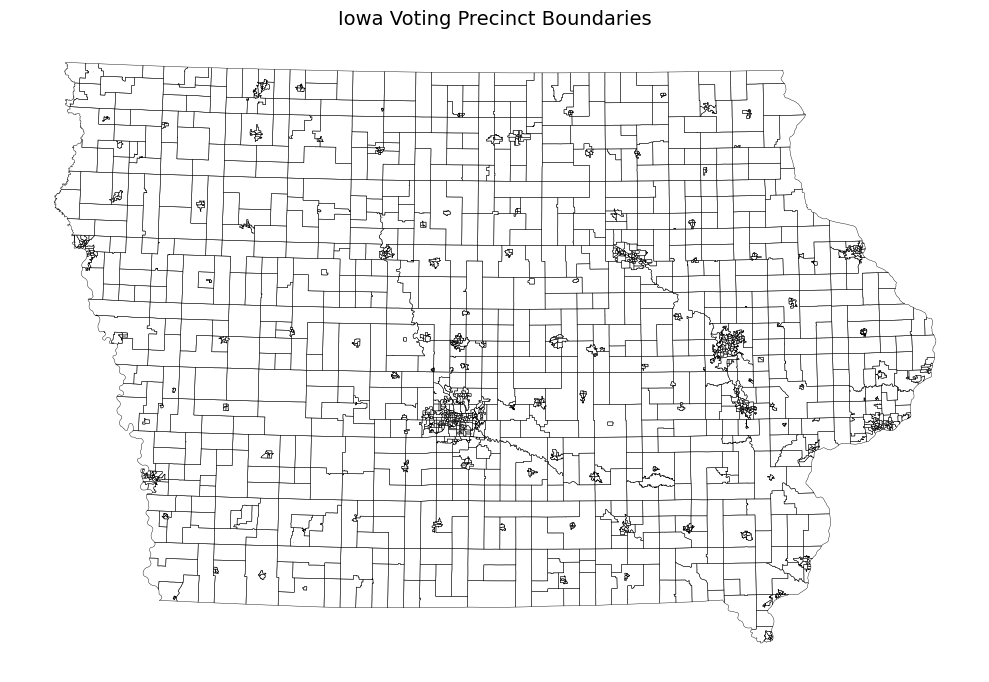

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# -----------------------------
# Load precinct shapefile
# -----------------------------
precincts = gpd.read_file(r"C:\Users\18607\OneDrive - University of Connecticut\26 Spring\DSDA 4815\iowa-map\Iowa_Precincts14\Precincts.shp")

# -----------------------------
# Reproject to a good CRS for Iowa
# -----------------------------
precincts = precincts.to_crs("EPSG:26915")  # NAD83 / UTM zone 15N

# -----------------------------
# Create map
# -----------------------------
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

precincts.plot(
    ax=ax,
    color="none",
    edgecolor="black",
    linewidth=0.3
)

# -----------------------------
# Styling
# -----------------------------
ax.set_title(
    "Iowa Voting Precinct Boundaries",
    fontsize=14
)
ax.axis("off")

plt.tight_layout()
plt.show()


In [3]:
import geopandas as gpd

precincts = gpd.read_file(r"C:\Users\18607\OneDrive - University of Connecticut\26 Spring\DSDA 4815\iowa-map\Iowa_Precincts14\Precincts.shp")

print(precincts.columns)


Index(['OBJECTID_1', 'ID', 'AREA', 'DISTRICT', 'NAME', 'POPULATION',
       'House_Dist', 'Senate_Dis', 'Congressio', 'geometry'],
      dtype='object')


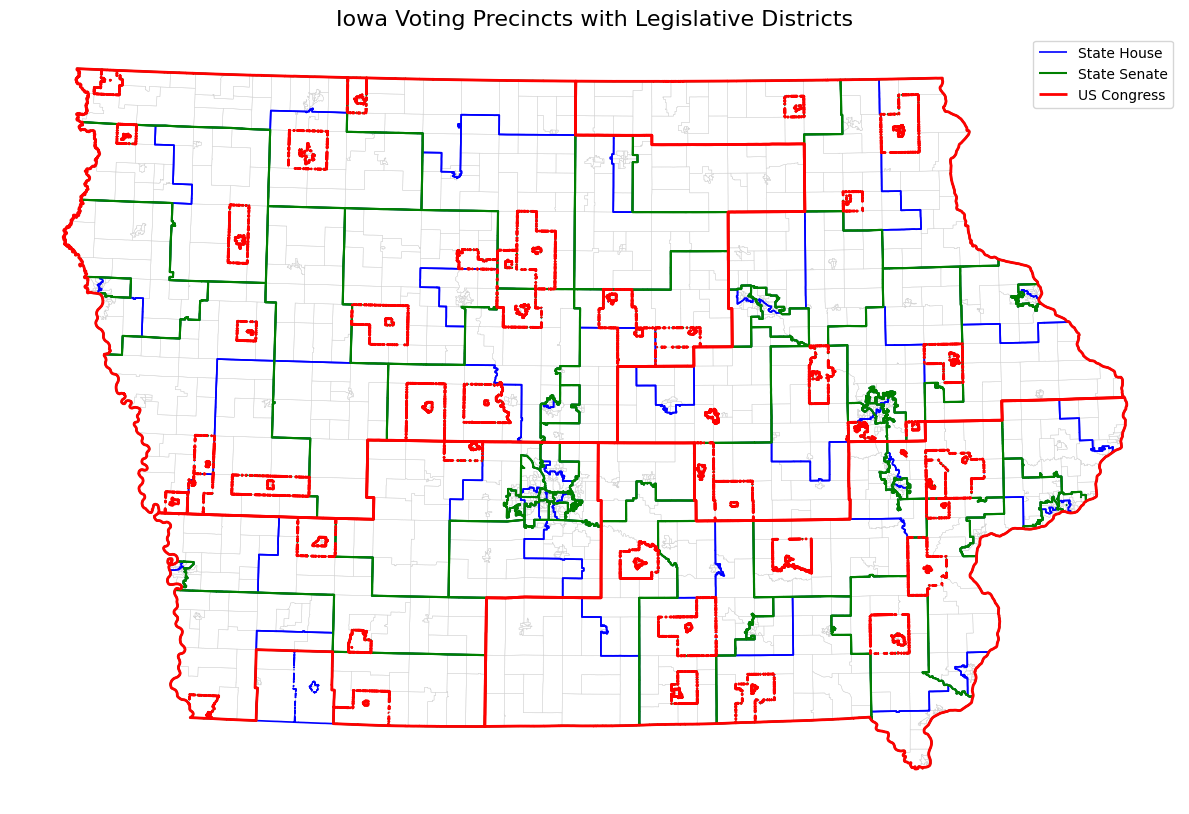

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# -----------------------------
# Load precinct shapefile
# -----------------------------
precincts = gpd.read_file(r"C:\Users\18607\OneDrive - University of Connecticut\26 Spring\DSDA 4815\iowa-map\Iowa_Precincts14\Precincts.shp")

# -----------------------------
# Reproject to a good CRS for Iowa
# -----------------------------
precincts = precincts.to_crs("EPSG:26915")  # NAD83 / UTM zone 15N

# -----------------------------
# Create figure and axes
# -----------------------------
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# -----------------------------
# Plot precinct boundaries
# -----------------------------
precincts.plot(ax=ax, color="none", edgecolor="lightgrey", linewidth=0.3)

# -----------------------------
# Plot State House districts
# -----------------------------
precincts.dissolve(by="House_Dist").boundary.plot(
    ax=ax, edgecolor="blue", linewidth=1.2, label="State House"
)

# -----------------------------
# Plot State Senate districts
# -----------------------------
precincts.dissolve(by="Senate_Dis").boundary.plot(
    ax=ax, edgecolor="green", linewidth=1.5, label="State Senate"
)

# -----------------------------
# Plot US Congressional districts
# -----------------------------
precincts.dissolve(by="Congressio").boundary.plot(
    ax=ax, edgecolor="red", linewidth=2, label="US Congress"
)

# -----------------------------
# Styling
# -----------------------------
ax.set_title("Iowa Voting Precincts with Legislative Districts", fontsize=16)
ax.axis("off")
ax.legend()

plt.tight_layout()
plt.show()


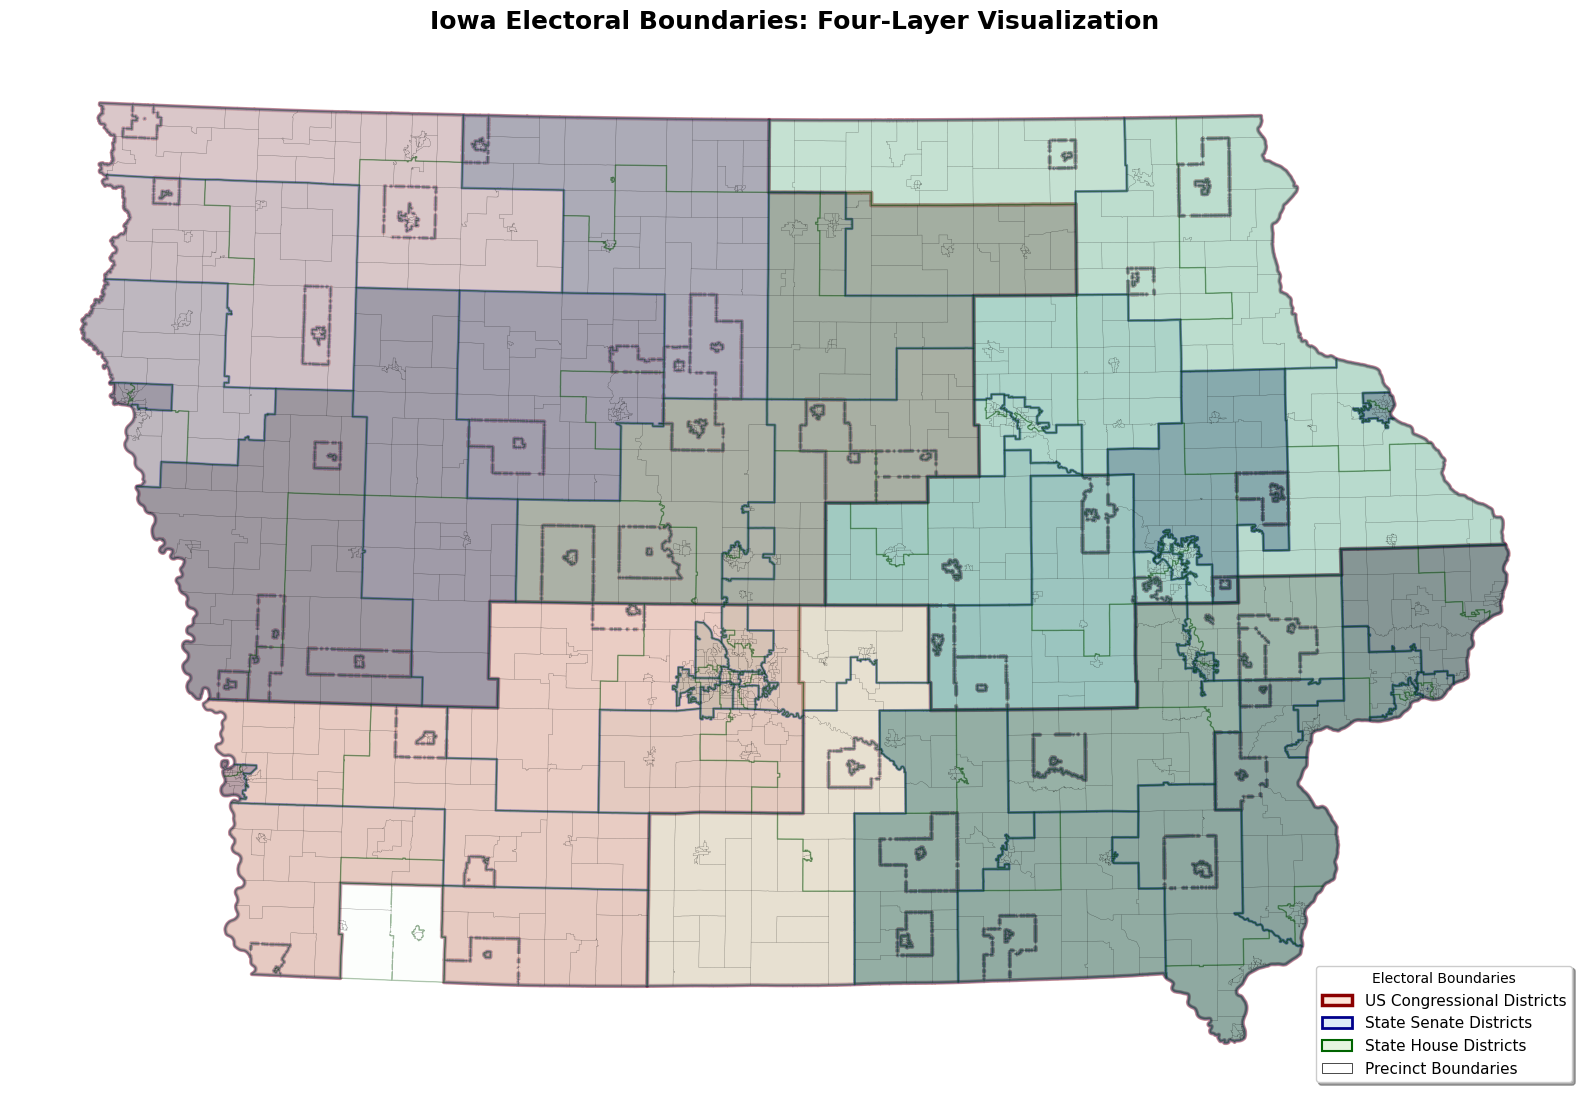

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# -----------------------------
# Load precinct shapefile
# -----------------------------
precincts = gpd.read_file(r"C:\Users\18607\OneDrive - University of Connecticut\26 Spring\DSDA 4815\iowa-map\Iowa_Precincts14\Precincts.shp")

# -----------------------------
# Reproject to a good CRS for Iowa
# -----------------------------
precincts = precincts.to_crs("EPSG:26915")  # NAD83 / UTM zone 15N

# -----------------------------
# Create dissolved layers for each district type
# Keep the column in the GeoDataFrame by resetting index
# -----------------------------
congress_districts = precincts.dissolve(by="Congressio").reset_index()
senate_districts = precincts.dissolve(by="Senate_Dis").reset_index()
house_districts = precincts.dissolve(by="House_Dist").reset_index()

# -----------------------------
# Create figure
# -----------------------------
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# -----------------------------
# Layer 1: US Congressional (Red fills, thick boundaries)
# -----------------------------
congress_districts.plot(
    ax=ax,
    column="Congressio",
    cmap='Reds',
    alpha=0.4,
    edgecolor='darkred',
    linewidth=3,
    categorical=True,
    vmin=0
)

# -----------------------------
# Layer 2: State Senate (Blue fills, medium boundaries)
# -----------------------------
senate_districts.plot(
    ax=ax,
    column="Senate_Dis",
    cmap='Blues',
    alpha=0.3,
    edgecolor='darkblue',
    linewidth=2,
    categorical=True,
    vmin=0
)

# -----------------------------
# Layer 3: State House (Green fills, thin boundaries)
# -----------------------------
house_districts.plot(
    ax=ax,
    column="House_Dist",
    cmap='Greens',
    alpha=0.25,
    edgecolor='darkgreen',
    linewidth=1,
    categorical=True,
    vmin=0
)

# -----------------------------
# Layer 4: Precinct Boundaries (just outlines)
# -----------------------------
precincts.plot(
    ax=ax,
    color="none",
    edgecolor="black",
    linewidth=0.15,
    alpha=0.4
)

# -----------------------------
# Create custom legend
# -----------------------------
legend_elements = [
    mpatches.Patch(facecolor='#fee5d9', edgecolor='darkred', linewidth=2.5, label='US Congressional Districts'),
    mpatches.Patch(facecolor='#deebf7', edgecolor='darkblue', linewidth=2, label='State Senate Districts'),
    mpatches.Patch(facecolor='#e5f5e0', edgecolor='darkgreen', linewidth=1.5, label='State House Districts'),
    mpatches.Patch(facecolor='none', edgecolor='black', linewidth=0.5, label='Precinct Boundaries')
]

ax.legend(
    handles=legend_elements,
    loc='lower right',
    fontsize=11,
    frameon=True,
    fancybox=True,
    shadow=True,
    title='Electoral Boundaries'
)

# -----------------------------
# Styling
# -----------------------------
ax.set_title(
    "Iowa Electoral Boundaries: Four-Layer Visualization",
    fontsize=18,
    fontweight='bold',
    pad=20
)
ax.axis("off")

plt.tight_layout()
plt.show()

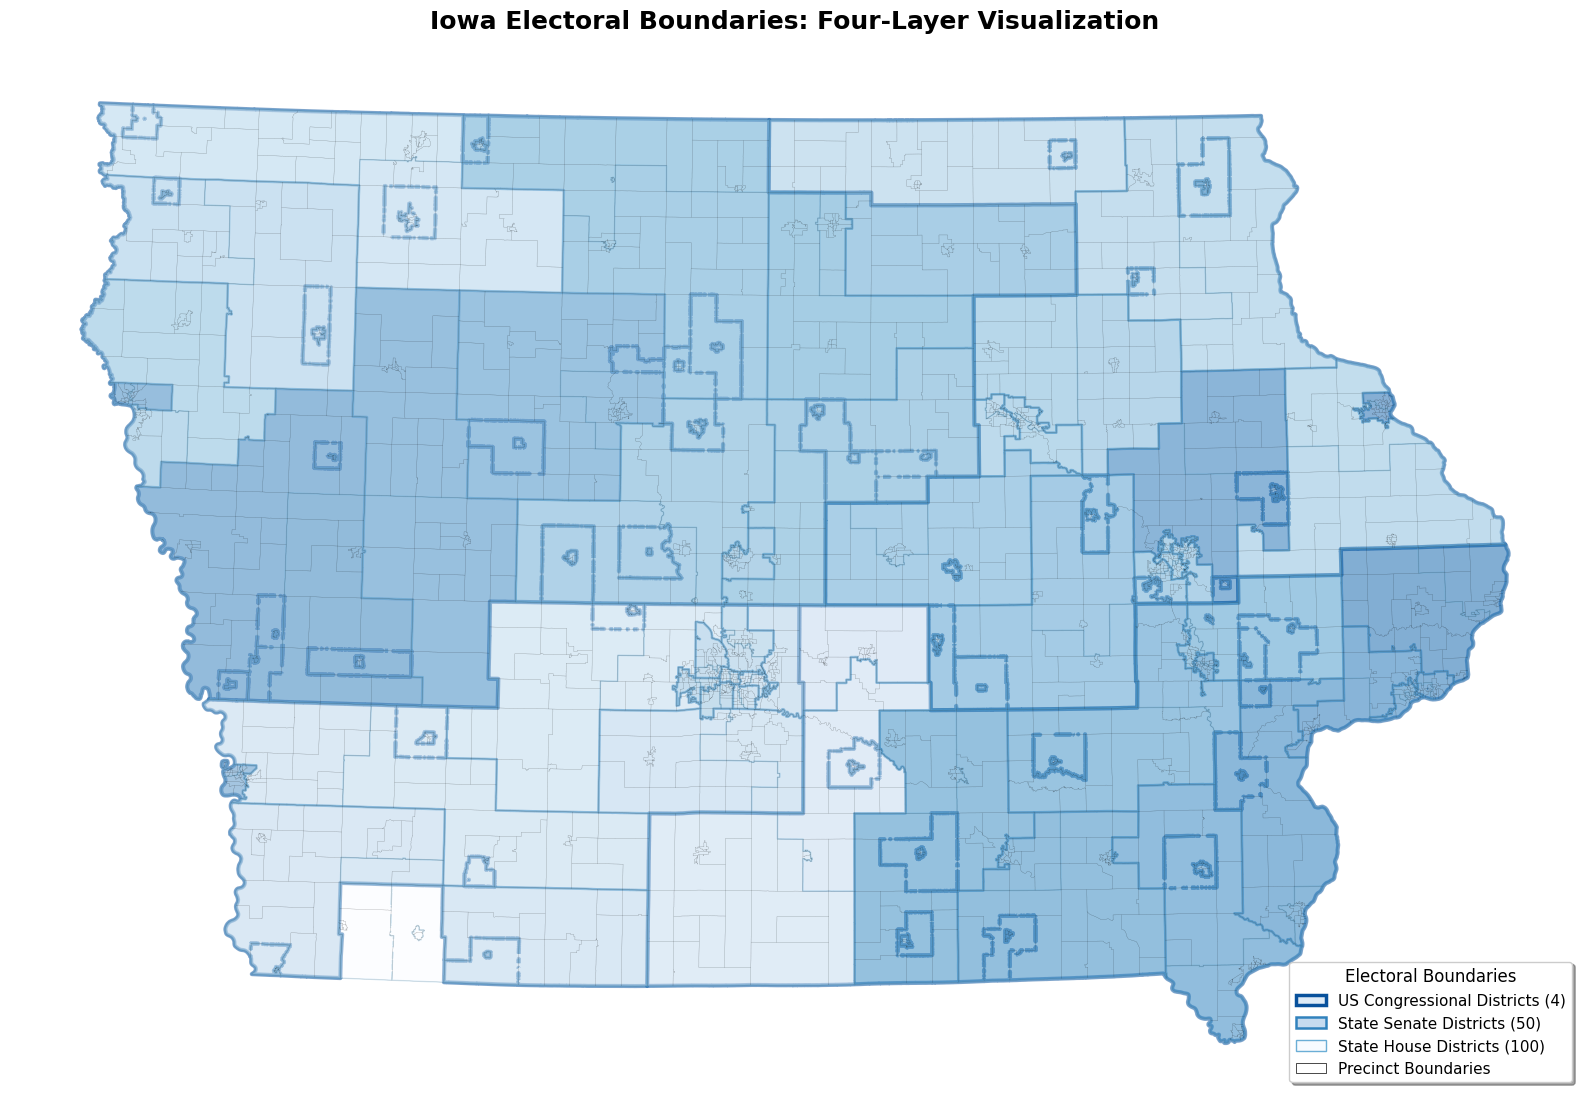

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# -----------------------------
# Load precinct shapefile
# -----------------------------
precincts = gpd.read_file(r"C:\Users\18607\OneDrive - University of Connecticut\26 Spring\DSDA 4815\iowa-map\Iowa_Precincts14\Precincts.shp")

# -----------------------------
# Reproject to a good CRS for Iowa
# -----------------------------
precincts = precincts.to_crs("EPSG:26915")  # NAD83 / UTM zone 15N

# -----------------------------
# Create dissolved layers for each district type
# -----------------------------
congress_districts = precincts.dissolve(by="Congressio").reset_index()
senate_districts = precincts.dissolve(by="Senate_Dis").reset_index()
house_districts = precincts.dissolve(by="House_Dist").reset_index()

# -----------------------------
# Create figure
# -----------------------------
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# -----------------------------
# Layer 1: US Congressional (Darkest blue, thick boundaries)
# -----------------------------
congress_districts.plot(
    ax=ax,
    column="Congressio",
    cmap='Blues',
    alpha=0.5,
    edgecolor='#08519c',  # Dark blue
    linewidth=3,
    categorical=True,
    vmin=0,
    vmax=len(congress_districts) + 2
)

# -----------------------------
# Layer 2: State Senate (Medium blue, medium boundaries)
# -----------------------------
senate_districts.plot(
    ax=ax,
    column="Senate_Dis",
    cmap='Blues',
    alpha=0.35,
    edgecolor='#3182bd',  # Medium blue
    linewidth=1.8,
    categorical=True,
    vmin=0,
    vmax=len(senate_districts) + 10
)

# -----------------------------
# Layer 3: State House (Light blue, thin boundaries)
# -----------------------------
house_districts.plot(
    ax=ax,
    column="House_Dist",
    cmap='Blues',
    alpha=0.25,
    edgecolor='#6baed6',  # Light blue
    linewidth=1,
    categorical=True,
    vmin=0,
    vmax=len(house_districts) + 20
)

# -----------------------------
# Layer 4: Precinct Boundaries (just outlines)
# -----------------------------
precincts.plot(
    ax=ax,
    color="none",
    edgecolor="black",
    linewidth=0.15,
    alpha=0.3
)

# -----------------------------
# Create custom legend
# -----------------------------
legend_elements = [
    mpatches.Patch(facecolor='#deebf7', edgecolor='#08519c', linewidth=2.5, 
                   label='US Congressional Districts (4)'),
    mpatches.Patch(facecolor='#c6dbef', edgecolor='#3182bd', linewidth=1.8, 
                   label='State Senate Districts (50)'),
    mpatches.Patch(facecolor='#f7fbff', edgecolor='#6baed6', linewidth=1, 
                   label='State House Districts (100)'),
    mpatches.Patch(facecolor='none', edgecolor='black', linewidth=0.5, 
                   label='Precinct Boundaries')
]

ax.legend(
    handles=legend_elements,
    loc='lower right',
    fontsize=11,
    frameon=True,
    fancybox=True,
    shadow=True,
    title='Electoral Boundaries',
    title_fontsize=12
)

# -----------------------------
# Styling
# -----------------------------
ax.set_title(
    "Iowa Electoral Boundaries: Four-Layer Visualization",
    fontsize=18,
    fontweight='bold',
    pad=20
)
ax.axis("off")

plt.tight_layout()
plt.show()

C:\Users\18607\AppData\Local\Temp\ipykernel_34456\1228372574.py:69: UserWarning: `keep_geom_type=True` in overlay resulted in 181 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  senate_clip = gpd.overlay(senate, cd_geom, how="intersection")
C:\Users\18607\AppData\Local\Temp\ipykernel_34456\1228372574.py:84: UserWarning: `keep_geom_type=True` in overlay resulted in 169 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  house_clip = gpd.overlay(house, cd_geom, how="intersection")
C:\Users\18607\AppData\Local\Temp\ipykernel_34456\1228372574.py:69: UserWarning: `keep_geom_type=True` in overlay resulted in 174 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  senate_clip = gpd.overlay(senate, cd_geom, how="intersection")
C:\Users\18607\AppData\Local\Temp\ipykernel_34456\1228372574.py:84: UserWarnin

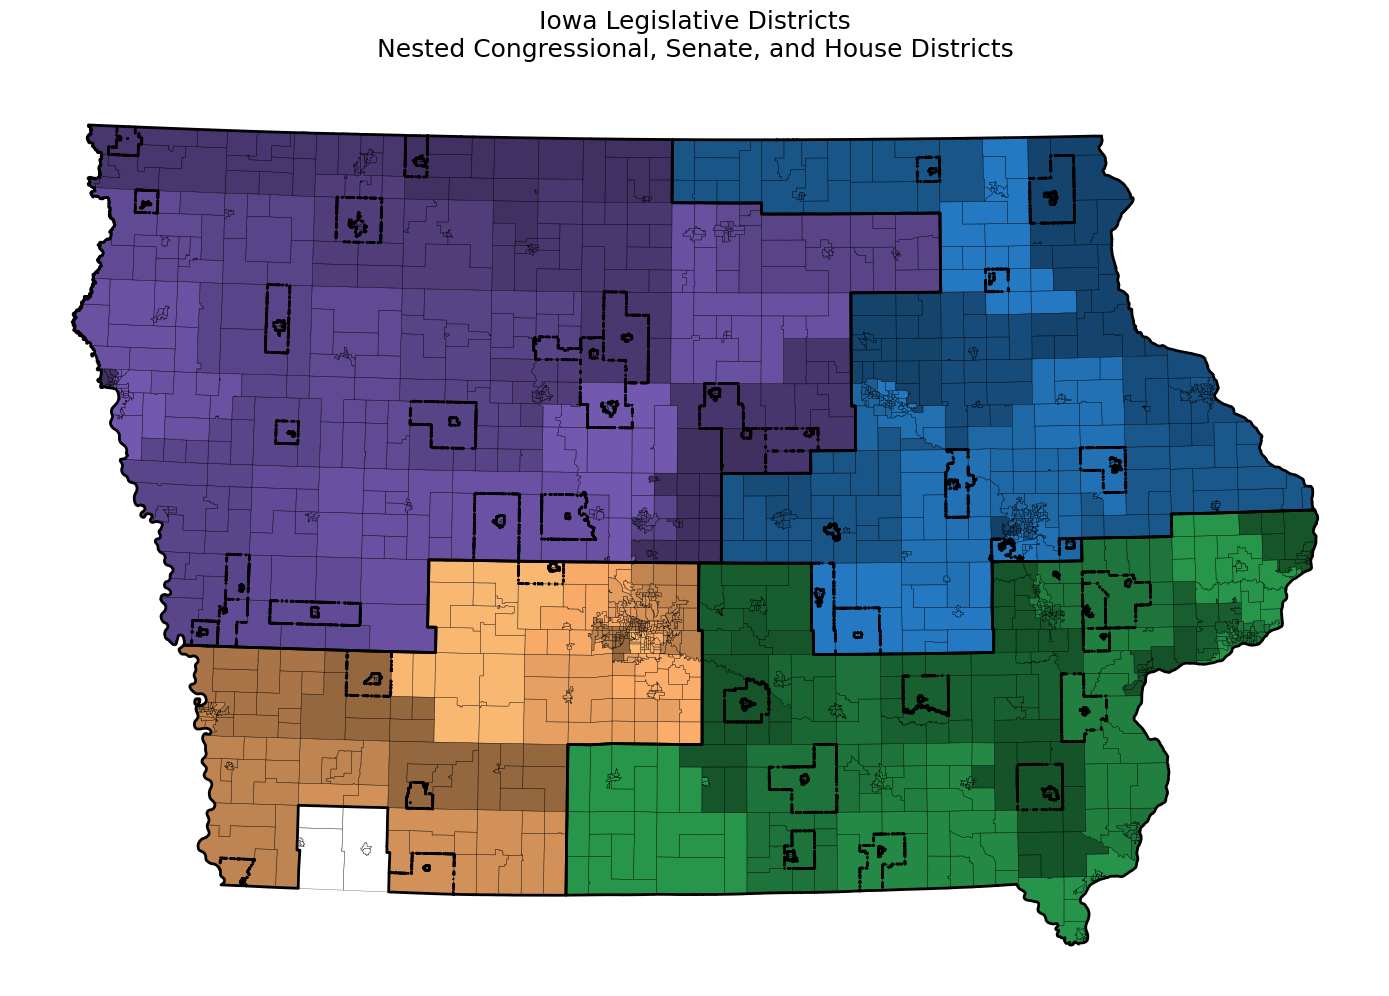

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

# -----------------------------
# Load precinct shapefile
# -----------------------------
precincts = gpd.read_file(
    r"C:\Users\18607\OneDrive - University of Connecticut\26 Spring\DSDA 4815\iowa-map\Iowa_Precincts14\Precincts.shp"
)

# -----------------------------
# Reproject to Iowa-friendly CRS
# -----------------------------
precincts = precincts.to_crs("EPSG:26915")

# -----------------------------
# Dissolve precincts into districts
# -----------------------------
house = precincts.dissolve(by="House_Dist").reset_index()
senate = precincts.dissolve(by="Senate_Dis").reset_index()
congress = precincts.dissolve(by="Congressio").reset_index()

# -----------------------------
# Force clean integer IDs (CRITICAL)
# -----------------------------
house["house_id"] = house["House_Dist"].astype(int)
senate["senate_id"] = senate["Senate_Dis"].astype(int)
congress["cd_id"] = congress["Congressio"].astype(int)

# -----------------------------
# Congressional color families
# -----------------------------
cd_colors = {
    1: "#2171b5",  # Blue
    2: "#238b45",  # Green
    3: "#fdae6b",  # Gold
    4: "#6a51a3"   # Purple
}

def adjust_shade(color, factor):
    r, g, b, a = to_rgba(color)
    return (
        min(1, r * factor),
        min(1, g * factor),
        min(1, b * factor),
        a
    )

# -----------------------------
# Create figure
# -----------------------------
fig, ax = plt.subplots(1, 1, figsize=(14, 14))

# -----------------------------
# Loop through Congressional Districts
# -----------------------------
for _, cd_row in congress.iterrows():

    base_color = cd_colors[cd_row["cd_id"]]

    cd_geom = gpd.GeoDataFrame(
        [cd_row],
        geometry="geometry",
        crs=congress.crs
    )

    # ---- State Senate (moderate shade variation)
    senate_clip = gpd.overlay(senate, cd_geom, how="intersection")
    senate_clip["shade"] = (
        senate_clip["senate_id"] % 5 + 6
    ) / 10

    senate_clip.plot(
        ax=ax,
        color=senate_clip["shade"].apply(
            lambda s: adjust_shade(base_color, s)
        ),
        edgecolor="none",
        alpha=0.9
    )

    # ---- State House (finer shade variation)
    house_clip = gpd.overlay(house, cd_geom, how="intersection")
    house_clip["shade"] = (
        house_clip["house_id"] % 7 + 7
    ) / 12

    house_clip.plot(
        ax=ax,
        color=house_clip["shade"].apply(
            lambda s: adjust_shade(base_color, s)
        ),
        edgecolor="none",
        alpha=0.95
    )

    # ---- Congressional boundary
    cd_geom.boundary.plot(
        ax=ax,
        edgecolor="black",
        linewidth=2.0
    )

# -----------------------------
# Precinct boundaries (visible)
# -----------------------------
precincts.boundary.plot(
    ax=ax,
    edgecolor="black",
    linewidth=0.3,
    alpha=0.6
)

# -----------------------------
# Styling
# -----------------------------
ax.set_title(
    "Iowa Legislative Districts\nNested Congressional, Senate, and House Districts",
    fontsize=18,
    pad=20
)
ax.axis("off")

plt.tight_layout()
plt.show()
